<a href="https://colab.research.google.com/github/ftamaki/postech/blob/main/TechChalenge_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import os
import kagglehub

# Baixar o dataset
path = kagglehub.dataset_download("khwaishsaxena/lung-cancer-dataset")
print("Path to dataset files:", path)

# Verificar os arquivos
files = os.listdir(path)
print("Arquivos encontrados:", files)

# Carregar o dataset
file_path = os.path.join(path, 'Lung Cancer.csv')
df = pd.read_csv(file_path)
df.head()
df_pdata = df.copy()      # será usado para o pré-processamento

Path to dataset files: /kaggle/input/lung-cancer-dataset
Arquivos encontrados: ['Lung Cancer.csv']


In [115]:
df_pdata.columns = df_pdata.columns.str.replace(' ', '', regex=True).str.upper()

In [116]:
df_pdata.describe(include='all')  # Traz também colunas categóricas
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,SMOKING_STATUS,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,ASTHMA,CIRRHOSIS,OTHER_CANCER,TREATMENT_TYPE,END_TREATMENT_DATE,SURVIVED
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [117]:
# Verifica valores ausentes
df_pdata.isnull().sum()

,0
ID,0
AGE,0
GENDER,0
COUNTRY,0
DIAGNOSIS_DATE,0
CANCER_STAGE,0
FAMILY_HISTORY,0
SMOKING_STATUS,0
BMI,0
CHOLESTEROL_LEVEL,0


In [118]:
stage_mapping = {
    'Male': 1,
    'Female': 2
}

df_pdata['GENDER'] = df_pdata['GENDER'].map(stage_mapping)
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,SMOKING_STATUS,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,ASTHMA,CIRRHOSIS,OTHER_CANCER,TREATMENT_TYPE,END_TREATMENT_DATE,SURVIVED
0,1,64.0,1,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,2,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,2,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,2,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,1,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [119]:
stage_mapping = {
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3
}

df_pdata['CANCER_STAGE'] = df_pdata['CANCER_STAGE'].map(stage_mapping)
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,SMOKING_STATUS,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,ASTHMA,CIRRHOSIS,OTHER_CANCER,TREATMENT_TYPE,END_TREATMENT_DATE,SURVIVED
0,1,64.0,1,Sweden,2016-04-05,1.0,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,2,Netherlands,2023-04-20,3.0,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,2,Hungary,2023-04-05,3.0,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,2,Belgium,2016-02-05,1.0,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,1,Luxembourg,2023-11-29,1.0,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [121]:
df_pdata['TREATMENT_TYPE'].unique()

array(['Chemotherapy', 'Surgery', 'Combined', 'Radiation'], dtype=object)

In [122]:
df_pdata = pd.get_dummies(df_pdata, columns=['TREATMENT_TYPE'], prefix='TREATMENT')
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,SMOKING_STATUS,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,ASTHMA,CIRRHOSIS,OTHER_CANCER,END_TREATMENT_DATE,SURVIVED,TREATMENT_Chemotherapy,TREATMENT_Combined,TREATMENT_Radiation,TREATMENT_Surgery
0,1,64.0,1,Sweden,2016-04-05,1.0,Yes,Passive Smoker,29.4,199,0,0,1,0,2017-09-10,0,True,False,False,False
1,2,50.0,2,Netherlands,2023-04-20,3.0,Yes,Passive Smoker,41.2,280,1,1,0,0,2024-06-17,1,False,False,False,True
2,3,65.0,2,Hungary,2023-04-05,3.0,Yes,Former Smoker,44.0,268,1,1,0,0,2024-04-09,0,False,True,False,False
3,4,51.0,2,Belgium,2016-02-05,1.0,No,Passive Smoker,43.0,241,1,1,0,0,2017-04-23,0,True,False,False,False
4,5,37.0,1,Luxembourg,2023-11-29,1.0,No,Passive Smoker,19.7,178,0,0,0,0,2025-01-08,0,False,True,False,False


In [127]:
# Normatizando Family History
df_pdata['FAMILY_HISTORY'].unique()
df_pdata['FAMILY_HISTORY'] = df_pdata['FAMILY_HISTORY'].map({'No': 0, 'Yes': 1})

In [129]:
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,SMOKING_STATUS,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,ASTHMA,CIRRHOSIS,OTHER_CANCER,END_TREATMENT_DATE,SURVIVED,TREATMENT_Chemotherapy,TREATMENT_Combined,TREATMENT_Radiation,TREATMENT_Surgery
0,1,64.0,1,Sweden,2016-04-05,1.0,1,Passive Smoker,29.4,199,0,0,1,0,2017-09-10,0,True,False,False,False
1,2,50.0,2,Netherlands,2023-04-20,3.0,1,Passive Smoker,41.2,280,1,1,0,0,2024-06-17,1,False,False,False,True
2,3,65.0,2,Hungary,2023-04-05,3.0,1,Former Smoker,44.0,268,1,1,0,0,2024-04-09,0,False,True,False,False
3,4,51.0,2,Belgium,2016-02-05,1.0,0,Passive Smoker,43.0,241,1,1,0,0,2017-04-23,0,True,False,False,False
4,5,37.0,1,Luxembourg,2023-11-29,1.0,0,Passive Smoker,19.7,178,0,0,0,0,2025-01-08,0,False,True,False,False


In [139]:
# Selecionar colunas não numéricas (object, category ou string)
non_numeric_cols = df_pdata.select_dtypes(exclude=['number']).columns

# Mostrar os valores únicos de cada coluna não numérica
for col in non_numeric_cols:
    print(f"Coluna: {col}")
    print(df_pdata[col].unique())
    print("-" * 50)


Coluna: COUNTRY
['Sweden' 'Netherlands' 'Hungary' 'Belgium' 'Luxembourg' 'Italy' 'Croatia'
 'Denmark' 'Malta' 'Germany' 'Poland' 'Ireland' 'Romania' 'Spain' 'Greece'
 'Estonia' 'Cyprus' 'France' 'Slovenia' 'Latvia' 'Portugal' 'Austria'
 'Czech Republic' 'Finland' 'Lithuania' 'Slovakia' 'Bulgaria']
--------------------------------------------------
Coluna: DIAGNOSIS_DATE
<DatetimeArray>
['2016-04-05 00:00:00', '2023-04-20 00:00:00', '2023-04-05 00:00:00',
 '2016-02-05 00:00:00', '2023-11-29 00:00:00', '2023-01-02 00:00:00',
 '2018-05-21 00:00:00', '2017-02-18 00:00:00', '2021-03-21 00:00:00',
 '2021-11-30 00:00:00',
 ...
 '2017-06-12 00:00:00', '2022-10-19 00:00:00', '2021-02-12 00:00:00',
 '2014-07-17 00:00:00', '2021-07-28 00:00:00', '2018-07-07 00:00:00',
 '2017-12-07 00:00:00', '2017-12-27 00:00:00', '2021-04-22 00:00:00',
 '2020-04-02 00:00:00']
Length: 3651, dtype: datetime64[ns]
--------------------------------------------------
Coluna: END_TREATMENT_DATE
<DatetimeArray>
['2017-0

In [133]:
df_pdata = pd.get_dummies(df_pdata, columns=['SMOKING_STATUS'], prefix='SMOKING')
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,...,END_TREATMENT_DATE,SURVIVED,TREATMENT_Chemotherapy,TREATMENT_Combined,TREATMENT_Radiation,TREATMENT_Surgery,SMOKING_Current Smoker,SMOKING_Former Smoker,SMOKING_Never Smoked,SMOKING_Passive Smoker
0,1,64.0,1,Sweden,2016-04-05,1.0,1,29.4,199,0,...,2017-09-10,0,True,False,False,False,False,False,False,True
1,2,50.0,2,Netherlands,2023-04-20,3.0,1,41.2,280,1,...,2024-06-17,1,False,False,False,True,False,False,False,True
2,3,65.0,2,Hungary,2023-04-05,3.0,1,44.0,268,1,...,2024-04-09,0,False,True,False,False,False,True,False,False
3,4,51.0,2,Belgium,2016-02-05,1.0,0,43.0,241,1,...,2017-04-23,0,True,False,False,False,False,False,False,True
4,5,37.0,1,Luxembourg,2023-11-29,1.0,0,19.7,178,0,...,2025-01-08,0,False,True,False,False,False,False,False,True


In [135]:
df_pdata['DIAGNOSIS_DATE'] = pd.to_datetime(df_pdata['DIAGNOSIS_DATE'])
df_pdata['END_TREATMENT_DATE'] = pd.to_datetime(df_pdata['END_TREATMENT_DATE'])
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,...,END_TREATMENT_DATE,SURVIVED,TREATMENT_Chemotherapy,TREATMENT_Combined,TREATMENT_Radiation,TREATMENT_Surgery,SMOKING_Current Smoker,SMOKING_Former Smoker,SMOKING_Never Smoked,SMOKING_Passive Smoker
0,1,64.0,1,Sweden,2016-04-05,1.0,1,29.4,199,0,...,2017-09-10,0,True,False,False,False,False,False,False,True
1,2,50.0,2,Netherlands,2023-04-20,3.0,1,41.2,280,1,...,2024-06-17,1,False,False,False,True,False,False,False,True
2,3,65.0,2,Hungary,2023-04-05,3.0,1,44.0,268,1,...,2024-04-09,0,False,True,False,False,False,True,False,False
3,4,51.0,2,Belgium,2016-02-05,1.0,0,43.0,241,1,...,2017-04-23,0,True,False,False,False,False,False,False,True
4,5,37.0,1,Luxembourg,2023-11-29,1.0,0,19.7,178,0,...,2025-01-08,0,False,True,False,False,False,False,False,True


In [137]:
df_pdata['TREATMENT_DURATION'] = (df_pdata['END_TREATMENT_DATE'] - df_pdata['DIAGNOSIS_DATE']).dt.days
df_pdata.head()

,ID,AGE,GENDER,COUNTRY,DIAGNOSIS_DATE,CANCER_STAGE,FAMILY_HISTORY,BMI,CHOLESTEROL_LEVEL,HYPERTENSION,...,SURVIVED,TREATMENT_Chemotherapy,TREATMENT_Combined,TREATMENT_Radiation,TREATMENT_Surgery,SMOKING_Current Smoker,SMOKING_Former Smoker,SMOKING_Never Smoked,SMOKING_Passive Smoker,TREATMENT_DURATION
0,1,64.0,1,Sweden,2016-04-05,1.0,1,29.4,199,0,...,0,True,False,False,False,False,False,False,True,523
1,2,50.0,2,Netherlands,2023-04-20,3.0,1,41.2,280,1,...,1,False,False,False,True,False,False,False,True,424
2,3,65.0,2,Hungary,2023-04-05,3.0,1,44.0,268,1,...,0,False,True,False,False,False,True,False,False,370
3,4,51.0,2,Belgium,2016-02-05,1.0,0,43.0,241,1,...,0,True,False,False,False,False,False,False,True,443
4,5,37.0,1,Luxembourg,2023-11-29,1.0,0,19.7,178,0,...,0,False,True,False,False,False,False,False,True,406


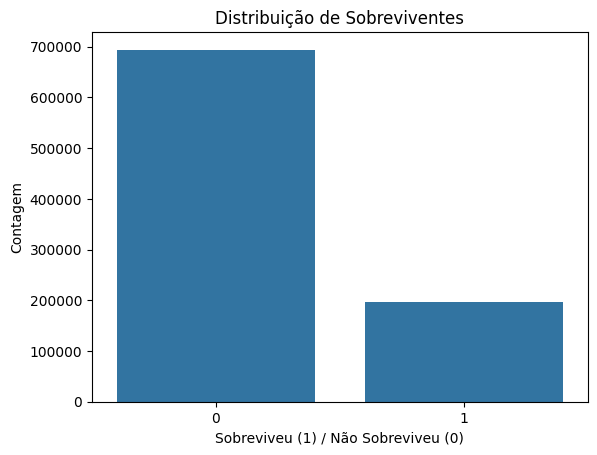

SURVIVED
0    693996
1    196004
Name: count, dtype: int64


In [140]:
# Verificar a distribuição de sobreviventes
survived_counts = df_pdata['SURVIVED'].value_counts()

# Plotar a distribuição de sobreviventes
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='SURVIVED', data=df_pdata)
plt.title("Distribuição de Sobreviventes")
plt.xlabel("Sobreviveu (1) / Não Sobreviveu (0)")
plt.ylabel("Contagem")
plt.show()

# Mostrar a contagem
print(survived_counts)


In [142]:
# Filtrar apenas colunas numéricas
numeric_df = df_pdata.select_dtypes(include='number')

# Calcular a correlação apenas entre colunas numéricas
correlation = numeric_df.corr()

# Mostrar correlações com 'SURVIVED'
print(correlation['SURVIVED'].sort_values(ascending=False))


SURVIVED              1.000000
CANCER_STAGE          0.002360
CIRRHOSIS             0.001956
FAMILY_HISTORY        0.001322
AGE                   0.001233
ID                    0.000517
CHOLESTEROL_LEVEL     0.000157
HYPERTENSION          0.000059
BMI                   0.000007
TREATMENT_DURATION   -0.000691
GENDER               -0.000762
ASTHMA               -0.001809
OTHER_CANCER         -0.001972
Name: SURVIVED, dtype: float64


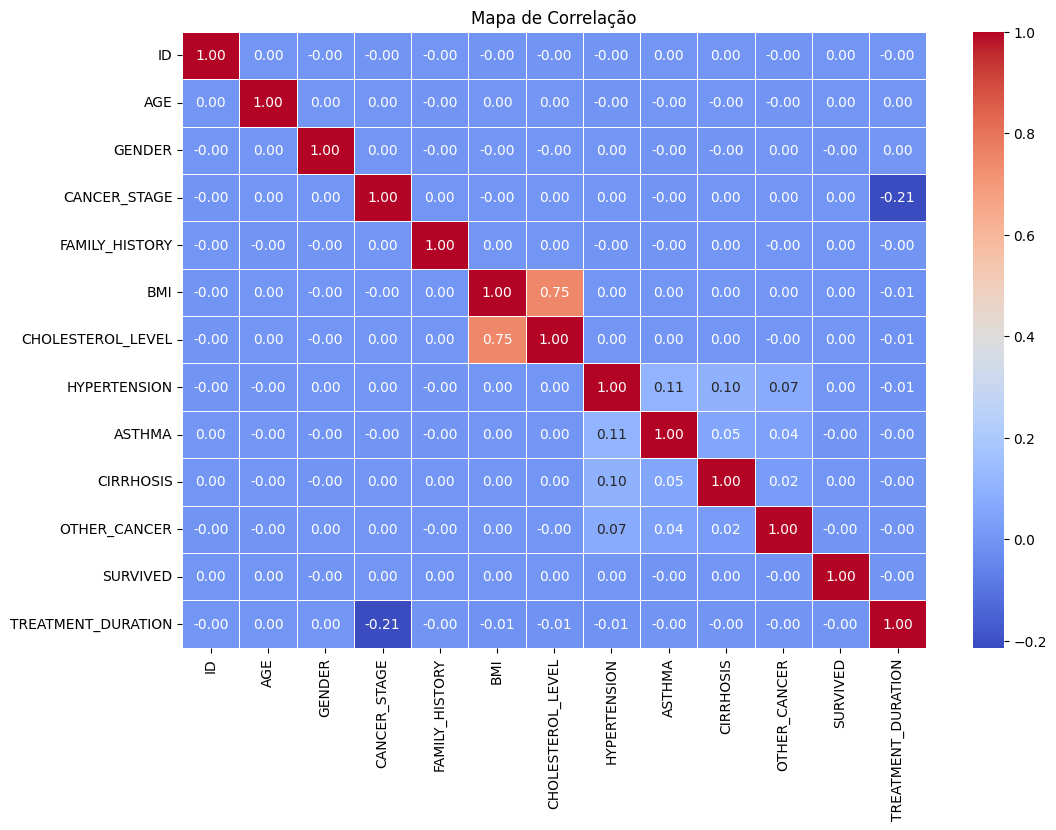

In [143]:
# Visualizar a correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()


<Axes: xlabel='treatment_type', ylabel='count'>

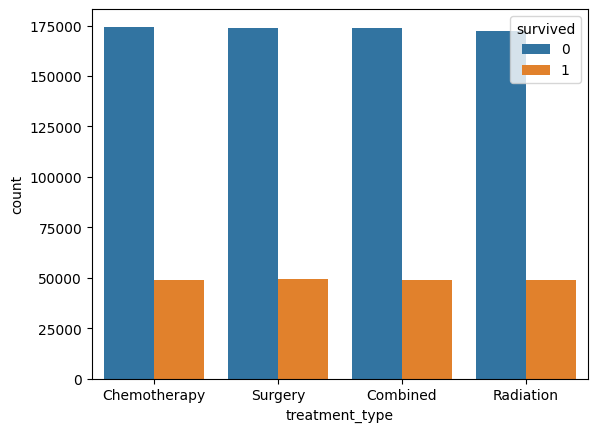

In [152]:
#usando tabela original
sns.countplot(x='treatment_type', hue='survived', data=df)

Text(0.5, 1.0, 'Distribuição da Idade por Sobrevivência')

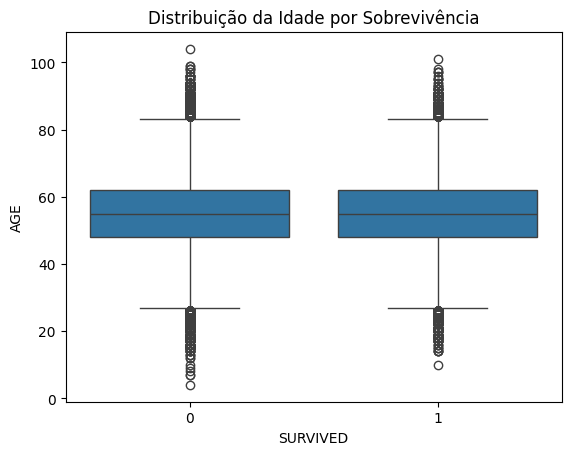

In [155]:
sns.boxplot(x='SURVIVED', y='AGE', data=df_pdata)
plt.title("Distribuição da Idade por Sobrevivência")


Text(0.5, 1.0, 'Duração do Tratamento por Sobrevivência')

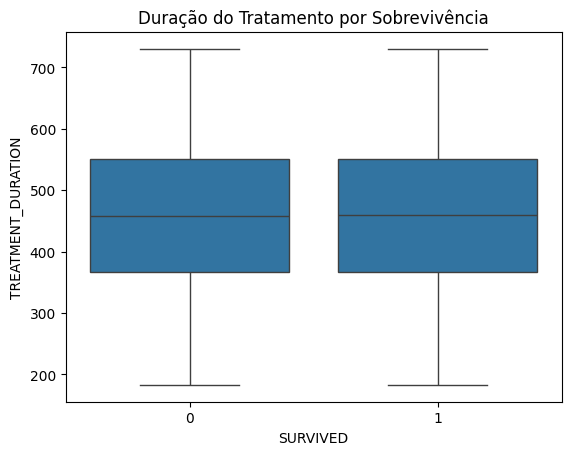

In [156]:
sns.boxplot(x='SURVIVED', y='TREATMENT_DURATION', data=df_pdata)
plt.title("Duração do Tratamento por Sobrevivência")


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


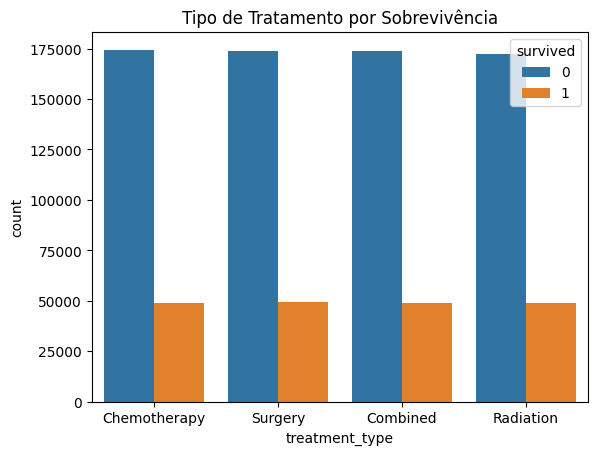

In [163]:
sns.countplot(x='treatment_type', hue='survived', data=df)
plt.title("Tipo de Tratamento por Sobrevivência")
df.head()

Text(0.5, 1.0, 'Status de Fumo por Sobrevivência')

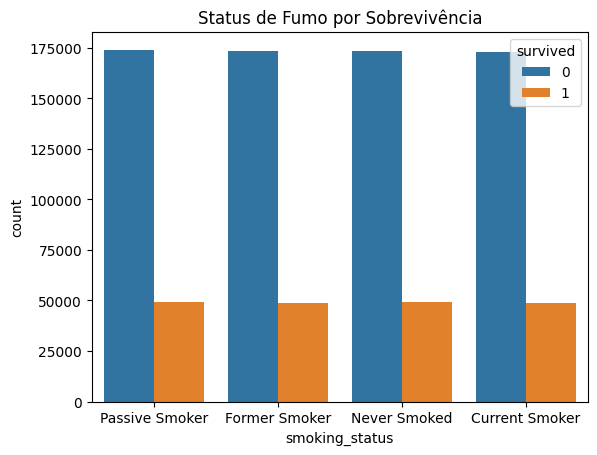

In [165]:
sns.countplot(x='smoking_status', hue='survived', data=df)
plt.title("Status de Fumo por Sobrevivência")


Text(0.5, 1.0, 'Histórico Familiar por Sobrevivência')

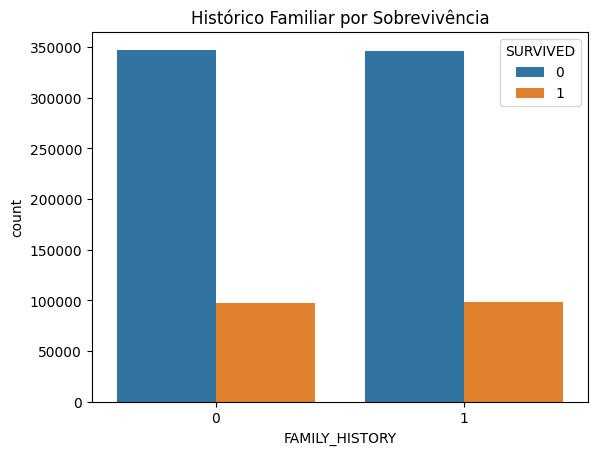

In [166]:
sns.countplot(x='FAMILY_HISTORY', hue='SURVIVED', data=df_pdata)
plt.title("Histórico Familiar por Sobrevivência")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Sweden'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'Hungary'),
  Text(3, 0, 'Belgium'),
  Text(4, 0, 'Luxembourg'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Croatia'),
  Text(7, 0, 'Denmark'),
  Text(8, 0, 'Malta'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Poland'),
  Text(11, 0, 'Ireland'),
  Text(12, 0, 'Romania'),
  Text(13, 0, 'Spain'),
  Text(14, 0, 'Greece'),
  Text(15, 0, 'Estonia'),
  Text(16, 0, 'Cyprus'),
  Text(17, 0, 'France'),
  Text(18, 0, 'Slovenia'),
  Text(19, 0, 'Latvia'),
  Text(20, 0, 'Portugal'),
  Text(21, 0, 'Austria'),
  Text(22, 0, 'Czech Republic'),
  Text(23, 0, 'Finland'),
  Text(24, 0, 'Lithuania'),
  Text(25, 0, 'Slovakia'),
  Text(26, 0, 'Bulgaria')])

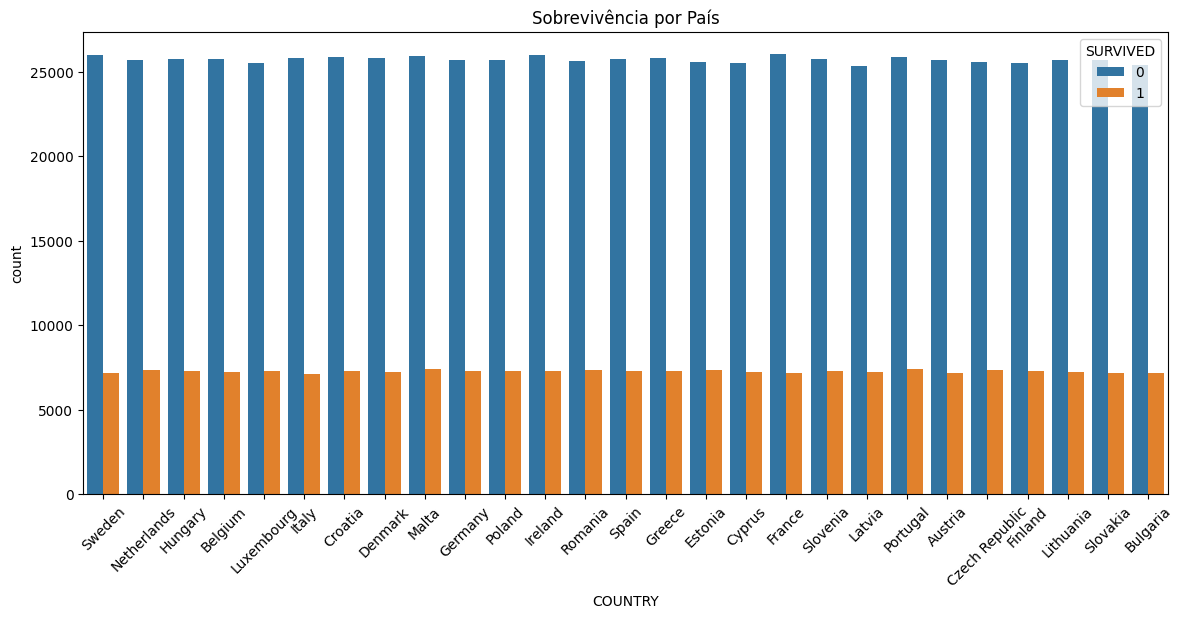

In [167]:
plt.figure(figsize=(14, 6))
sns.countplot(x='COUNTRY', hue='SURVIVED', data=df_pdata)
plt.title("Sobrevivência por País")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Mapa de Correlação')

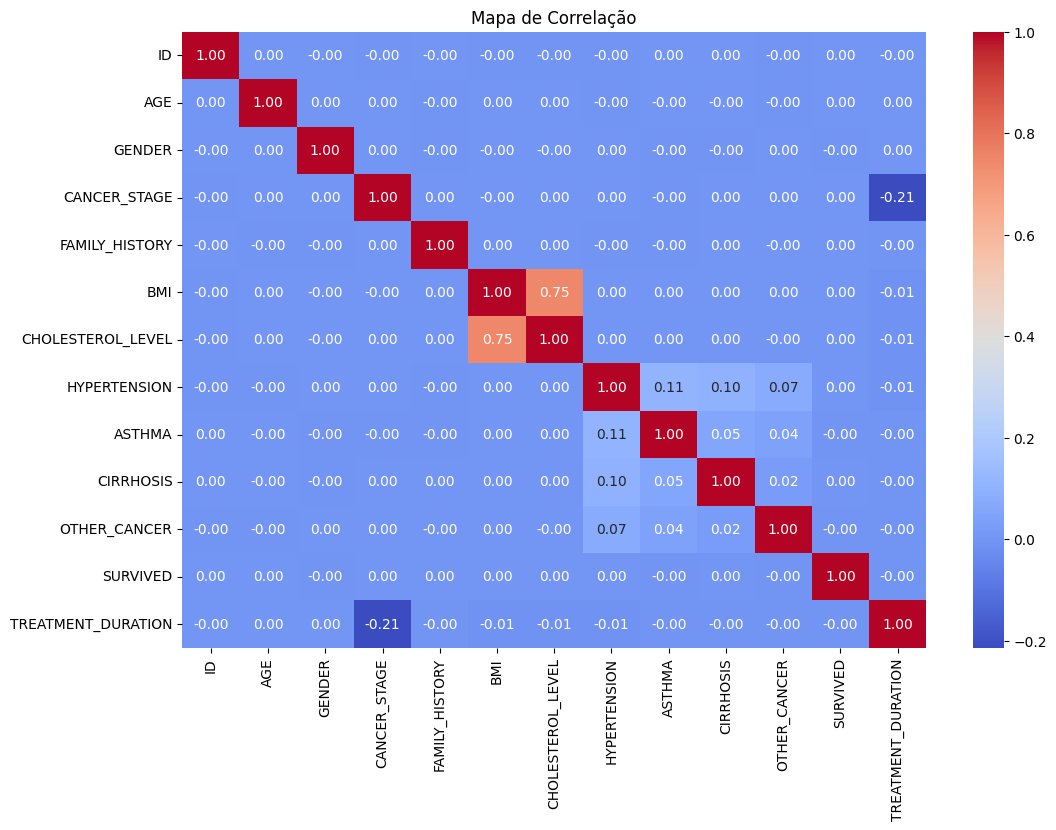

In [169]:
numeric_df = df_pdata.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Mapa de Correlação")


Text(0.5, 1.0, 'Distribuição da Duração do Tratamento por Sobrevivência')

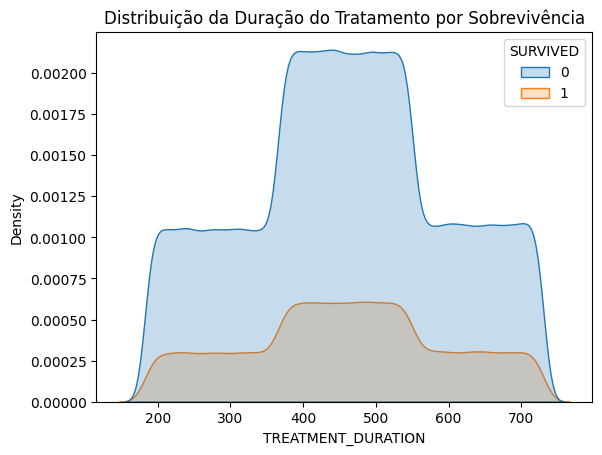

In [170]:
sns.kdeplot(data=df_pdata, x='TREATMENT_DURATION', hue='SURVIVED', fill=True)
plt.title("Distribuição da Duração do Tratamento por Sobrevivência")


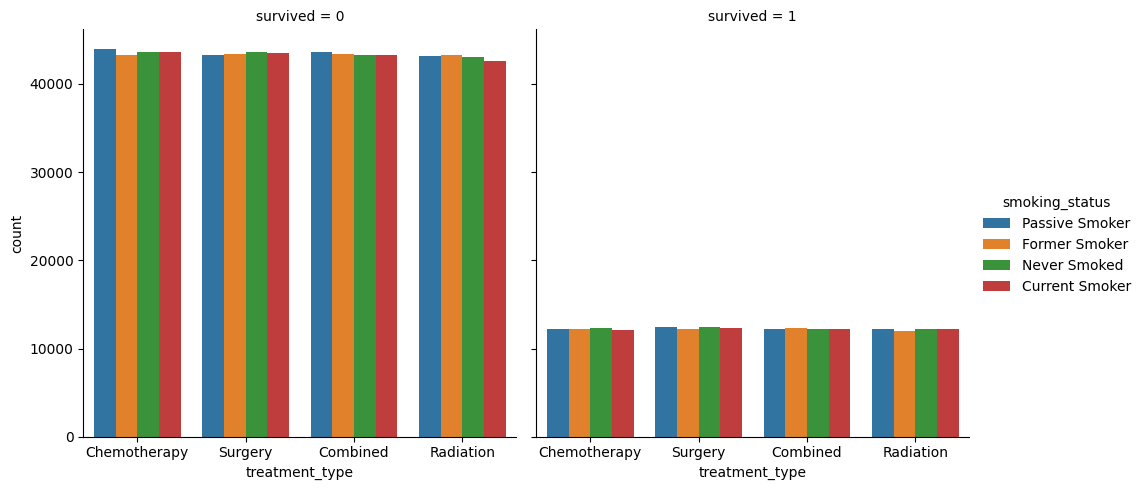

In [172]:
sns.catplot(data=df, x='treatment_type', hue='smoking_status', col='survived', kind='count', height=5)


<Axes: xlabel='smoking_status', ylabel='treatment_type'>

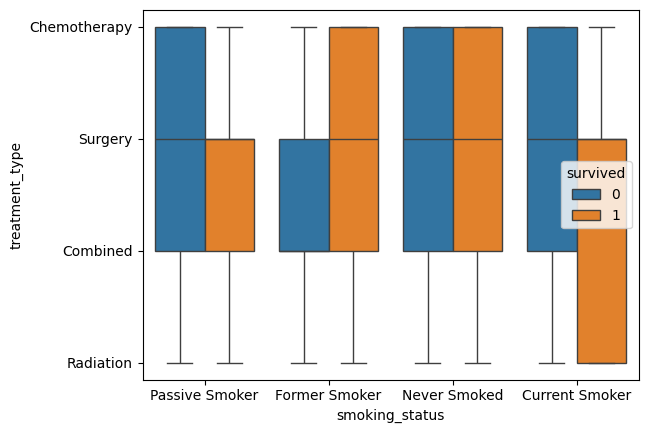

In [178]:
sns.boxplot(data=df, x='smoking_status', y='treatment_type', hue='survived')
